# 6.4 Practice- Supervised Machine Learning: Regression

This script contains the following:
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis¶

## 1. Importing libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
path = r'C:\Users\Barb\19-09-2024 Gun Violence Data'

In [8]:
df_gun = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-3.csv'), index_col = 0)

## 2. Data cleaning

In [10]:
df_gun.columns

Index(['date', 'state', 'n_killed', 'n_injured', 'gun_stolen', 'gun_type',
       'n_guns_involved', 'participant_age', 'participant_gender'],
      dtype='object')

In [11]:
df_gun.head(20)

,date,state,n_killed,n_injured,gun_stolen,gun_type,n_guns_involved,participant_age,participant_gender
0,2013-01-01,Pennsylvania,0,4,NaN,NaN,1.0,0::20,0::Male||1::Male||3::Male||4::Female
1,2013-01-01,California,1,3,NaN,NaN,1.0,0::20,0::Male
2,2013-01-01,Ohio,1,3,0::Unknown||1::Unknown,0::Unknown||1::Unknown,2.0,0::25||1::31||2::33||3::34||4::33,0::Male||1::Male||2::Male||3::Male||4::Male
3,2013-01-05,Colorado,4,0,NaN,NaN,1.0,0::29||1::33||2::56||3::33,0::Female||1::Male||2::Male||3::Male
4,2013-01-07,North Carolina,2,2,0::Unknown||1::Unknown,0::Handgun||1::Handgun,2.0,0::18||1::46||2::14||3::47,0::Female||1::Male||2::Male||3::Female
5,2013-01-07,Oklahoma,4,0,NaN,NaN,1.0,0::23||1::23||2::33||3::55,0::Female||1::Female||2::Female||3::Female||4:...
6,2013-01-19,New Mexico,5,0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Male||1::Female||2::Male||3::Female||4::Fem...
7,2013-01-21,Louisiana,0,5,NaN,NaN,1.0,NaN,0::Male||1::Male||2::Male||3::Male||4::Male
8,2013-01-21,California,0,4,NaN,NaN,1.0,NaN,0::Male||1::Male||2::Male||3::Male||4::Male
9,2013-01-23,Maryland,1,6,NaN,NaN,1.0,0::15,0::Male


In [12]:
df_gun.shape

(239677, 9)

### 2.1 Missing Values

In [14]:
# Check for missing values

df_gun.isnull().sum()

# I decided to leave the missing values and not do anything with them.

date                      0
state                     0
n_killed                  0
n_injured                 0
gun_stolen            99498
gun_type              99451
n_guns_involved           0
participant_age       92298
participant_gender    36362
dtype: int64

### 2.2 Duplicates check

In [16]:
dups = df_gun.duplicated()

In [17]:
dups.shape # No dups

(239677,)

### 2.3 Extreme values checks

C:\Users\Barb\AppData\Local\Temp\ipykernel_8692\3069742505.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gun['n_guns_involved'], bins=1) # Shows extreme values


<Axes: xlabel='n_guns_involved', ylabel='Density'>

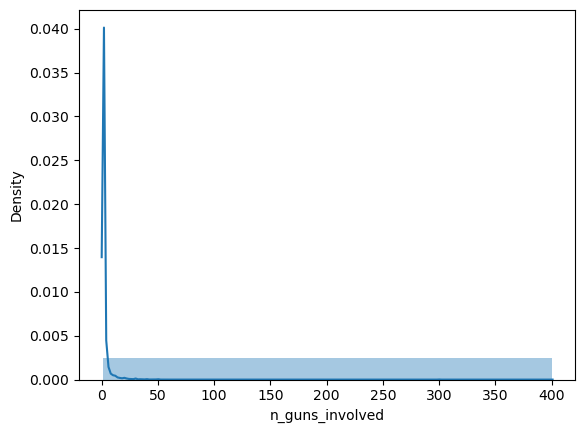

In [19]:
sns.distplot(df_gun['n_guns_involved'], bins=1) # Shows extreme values

C:\Users\Barb\AppData\Local\Temp\ipykernel_8692\3727290570.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gun['n_killed'], bins=1) # Shows extreme values


<Axes: xlabel='n_killed', ylabel='Density'>

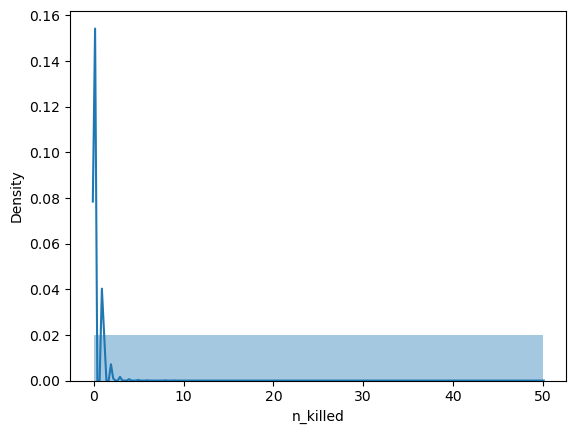

In [20]:
sns.distplot(df_gun['n_killed'], bins=1) # Shows extreme values

C:\Users\Barb\AppData\Local\Temp\ipykernel_8692\3508235907.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_gun['n_injured'], bins=1) # Shows extreme values


<Axes: xlabel='n_injured', ylabel='Density'>

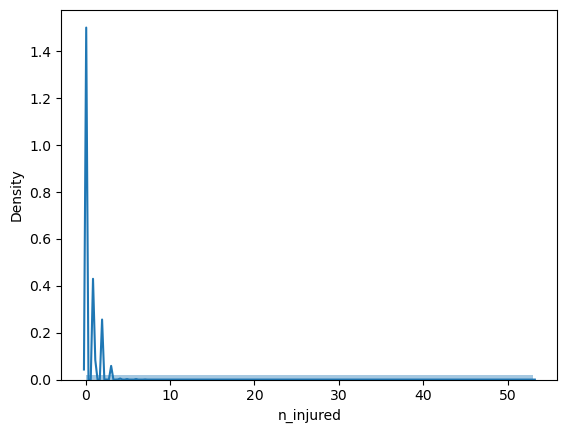

In [21]:


sns.distplot(df_gun['n_injured'], bins=1) # Shows extreme values

In [22]:
df_gun['n_guns_involved'].mean() # Check the mean

1.217901592559987

In [23]:
df_gun['n_guns_involved'].median() # Check the median

1.0

In [24]:
df_gun['n_guns_involved'].max() # Check the max

400.0

In [25]:
df_gun['n_killed'].mean() # Check the mean

0.25228953967214207

In [26]:
df_gun['n_killed'].median() # Check the median

0.0

In [27]:
df_gun['n_killed'].max() # Check the max

50

In [28]:
df_gun['n_injured'].mean() # Check the mean

0.4940065171042695

In [29]:
df_gun['n_injured'].median() # Check the median

0.0

In [30]:
df_gun['n_injured'].max() # Check the max

53

### Task 6.4 #5:  Hypothesis - As the number of people killed by guns increase, the fewer the number of people injured.

## 3. Data prep for regression analysis

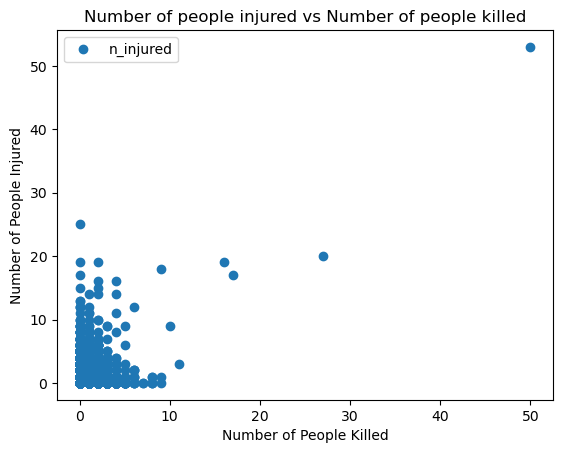

In [33]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_gun.plot(x = 'n_killed', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of people injured vs Number of people killed')  
plt.xlabel('Number of People Killed')  
plt.ylabel('Number of People Injured')  
plt.show()

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_gun['n_killed'].values.reshape(-1,1)
y = df_gun['n_injured'].values.reshape(-1,1)

In [35]:
X

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [36]:
y

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

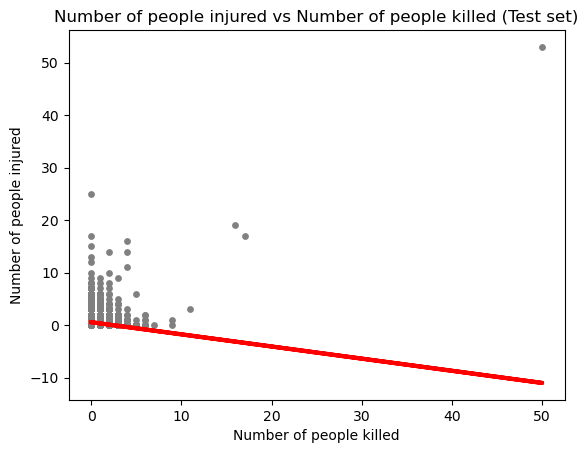

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number of people injured vs Number of people killed (Test set)')
plot_test.xlabel('Number of people killed')
plot_test.ylabel('Number of people injured')
plot_test.show()

### Task 6.4 #10:  The regression line of the model does not fit the test data set very well. Practically all of the data
###                 points are when the number of people killed is < 10.

In [44]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.23138944]]
Mean squared error:  0.5782445419147901
R2 score:  -0.012666493648213484


In [46]:
y_predicted

array([[ 0.55270218],
       [-0.37285556],
       [ 0.55270218],
       ...,
       [ 0.55270218],
       [ 0.55270218],
       [ 0.55270218]])

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.552702
1,1,-0.372856
2,1,0.552702
3,1,0.552702
4,0,0.552702
5,0,0.552702
6,1,0.552702
7,0,0.321313
8,0,0.552702
9,1,0.552702


##### Compare how the regression fits the training set

In [49]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [50]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [51]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.23138944]]
Mean squared error:  0.5026055107346404
R2 score:  0.0268298198851874


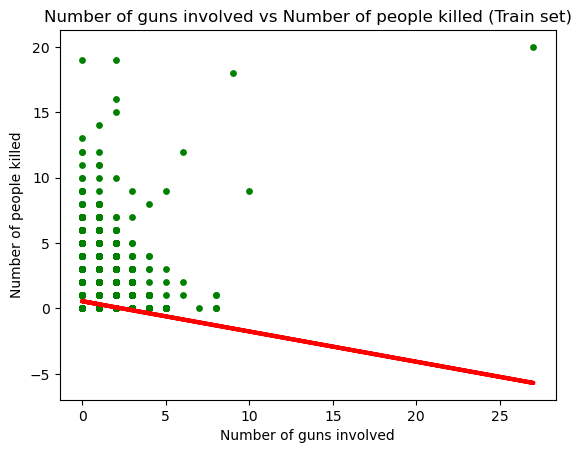

In [52]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of guns involved vs Number of people killed (Train set)')
plot_test.xlabel('Number of guns involved')
plot_test.ylabel('Number of people killed')
plot_test.show()

### Task 6.4 #13 -  The training set did not the regression line model well.

## 4. Export this dataframe with dropped columns as a csv file

In [97]:
# Check shape before exporting
df_gun.shape

(239677, 9)

In [99]:
#Export the updated dataframe as a csv file
df_gun.to_csv(os.path.join(path, '02 Data', 'Prepared', 'df_gun6-4.csv'))